In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [221]:
#load the training dataset
trainingdataset= pd.read_csv("/Users/fatimabankole/Downloads/ALS_TrainingData_2223-2.csv")

In [222]:
trainingdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [223]:
trainingdataset.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


/Users/fatimabankole/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


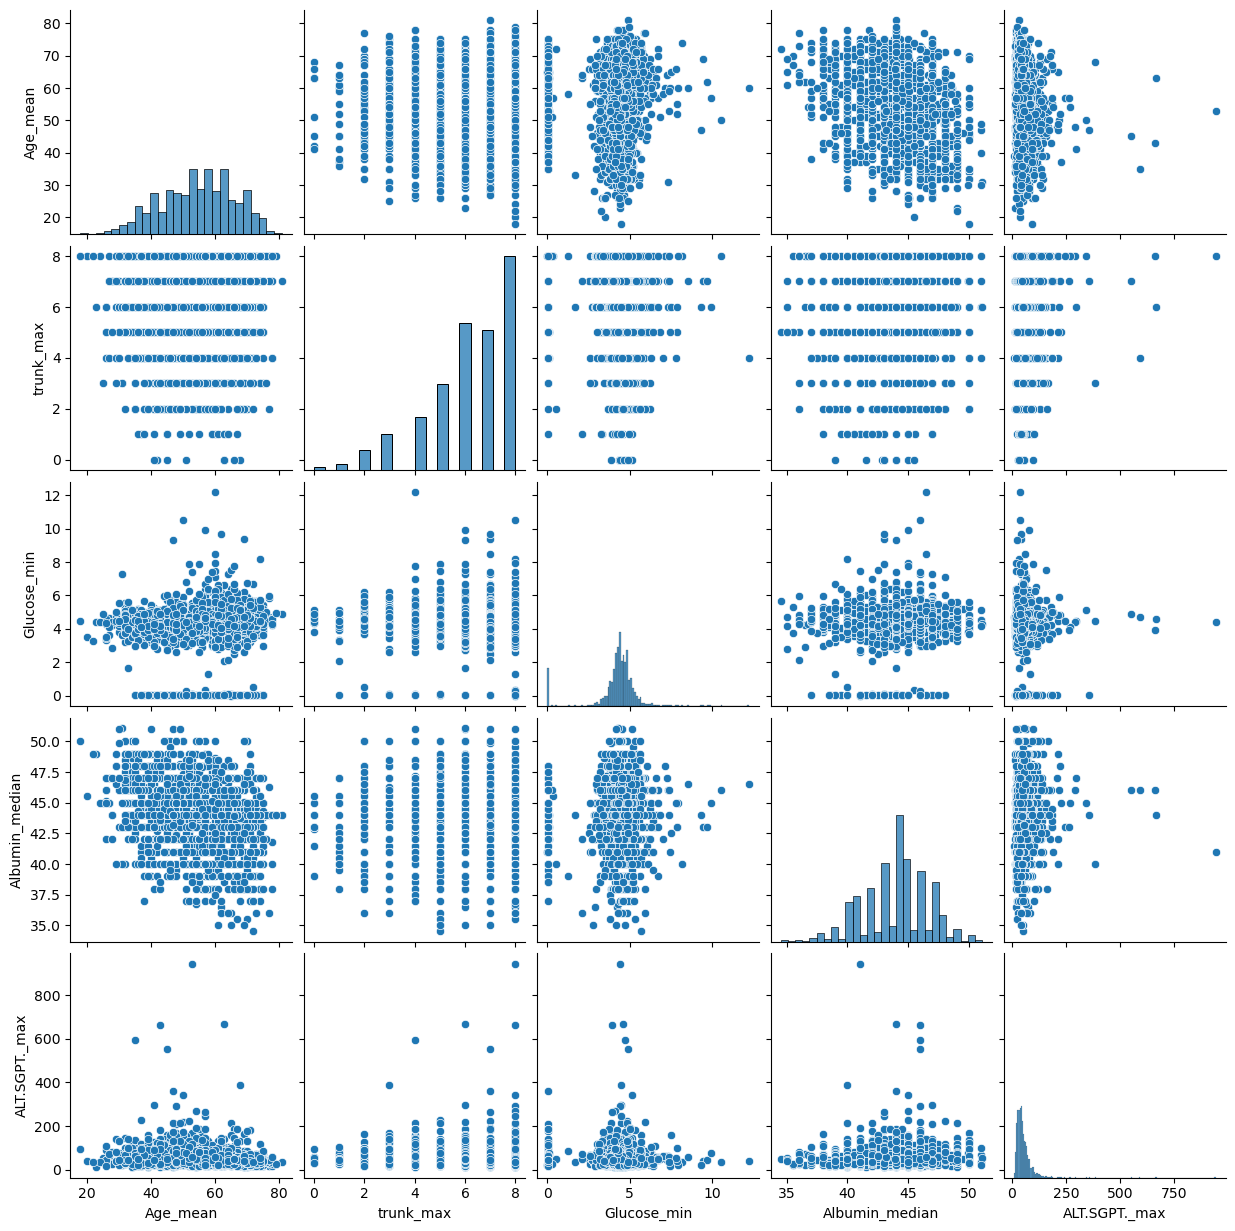

In [225]:
sns.pairplot(trainingdataset[['Age_mean', 'trunk_max', 'Glucose_min','Albumin_median', 'ALT.SGPT._max']])
plt.show()

In [203]:
#select features and cluster
selected_features =['Age_mean', 'trunk_max', 'Glucose_min']

In [204]:
#Normalizing the data to 0 and 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(trainingdataset[selected_features])

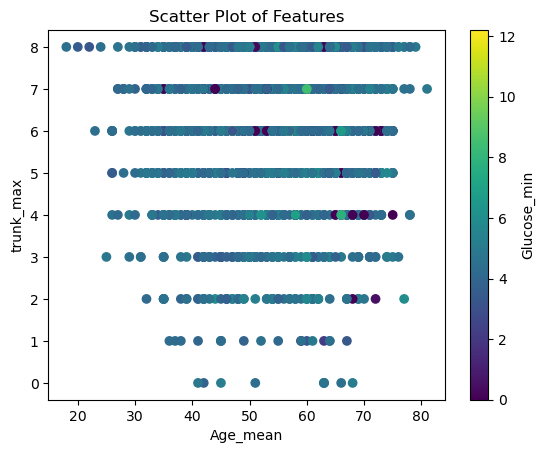

In [205]:
plt.scatter(trainingdataset['Age_mean'], trainingdataset['trunk_max'], c=trainingdataset['Glucose_min'], cmap='viridis')
plt.xlabel('Age_mean')
plt.ylabel('trunk_max')
plt.colorbar(label='Glucose_min')
plt.title('Scatter Plot of Features')
plt.show()


In [226]:
#kmeans clustering
k_values = [3, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)

In [227]:
#Evalating model performance
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"For k={k},{silhouette_avg}")

For k=5,0.31637504077987


In [228]:
#center of the cluster
cluster_centers = kmeans.cluster_centers_
print(f"Centers of Clusters for k={k}:\n{cluster_centers}")    

Centers of Clusters for k=5:
[[-1.03863277  0.33592681  0.10171556]
 [ 0.66472014 -0.50684696  0.29311962]
 [ 0.3174052  -0.05303573 -3.36901841]
 [-0.4594478  -1.88543526  0.16797691]
 [ 0.68852592  0.81982264  0.25182199]]


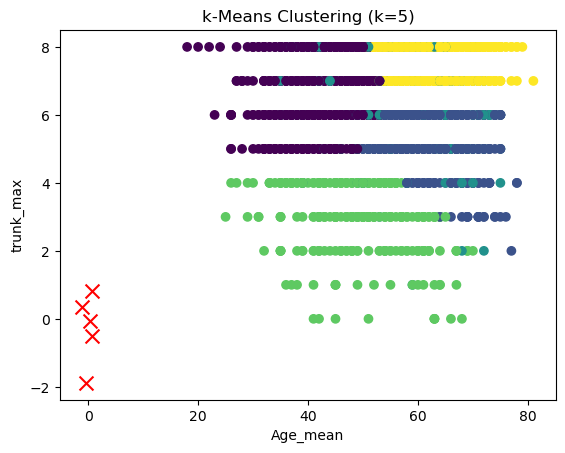

In [229]:
#visualizing the final cluster
plt.scatter(trainingdataset['Age_mean'], trainingdataset['trunk_max'], c=kmeans.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100)
plt.title(f'k-Means Clustering (k={k})')
plt.xlabel('Age_mean')
plt.ylabel('trunk_max')
plt.show()

In [230]:
#kmeans clustering
k_values = [5, 3]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)

In [231]:
#Evalating model performance
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"For k={k},{silhouette_avg}")

For k=3,0.3227286940287815


In [232]:
#center of the cluster
cluster_centers = kmeans.cluster_centers_
print(f"Centers of Clusters for k={k}:\n{cluster_centers}")    

Centers of Clusters for k=3:
[[ 0.56048157  0.42951065  0.25885652]
 [ 0.32074536 -0.07606883 -3.35623072]
 [-0.83344507 -0.59181226  0.12545977]]


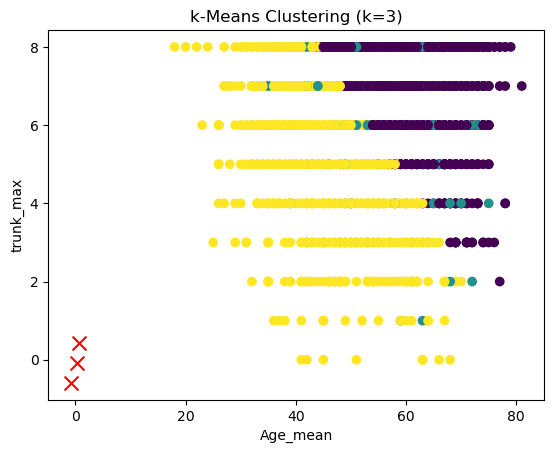

In [233]:
#visualizing the final cluster
plt.scatter(trainingdataset['Age_mean'], trainingdataset['trunk_max'], c=kmeans.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100)
plt.title(f'k-Means Clustering (k={k})')
plt.xlabel('Age_mean')
plt.ylabel('trunk_max')
plt.show()